<a href="https://colab.research.google.com/github/ayushi-k25/Pravas-Documentation/blob/main/Diabetes_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
teams=pd.read_csv("diabetes.csv");

In [ ]:
teams

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
teams =teams[["Glucose","Insulin","Age","BloodPressure","Outcome"]];

In [ ]:
teams

,Glucose,Insulin,Age,BloodPressure,Outcome
0,148,0,50,72,1
1,85,0,31,66,0
2,183,0,32,64,1
3,89,94,21,66,0
4,137,168,33,40,1
...,...,...,...,...,...
763,101,180,63,76,0
764,122,0,27,70,0
765,121,112,30,72,0
766,126,0,47,60,1


In [ ]:
teams.corr()["Outcome"]

,Outcome
Glucose,0.466581
Insulin,0.130548
Age,0.238356
BloodPressure,0.065068
Outcome,1.000000


In [ ]:
import seaborn as sb

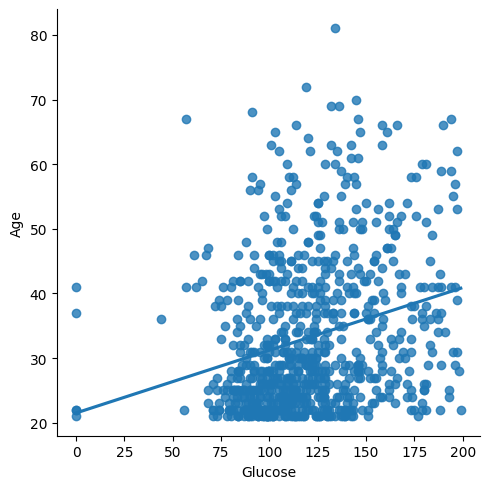

In [ ]:
sb.lmplot(x="Glucose",y="Age",data=teams,fit_reg=True,ci=None)

In [ ]:
train = teams[teams.index < 500].copy()
test  = teams[teams.index >= 500].copy()

In [ ]:
train.shape

(500, 5)

In [ ]:
test.shape

(268, 5)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [ ]:
predi=["Glucose","Age","Insulin"]
tar=["Outcome"]

In [ ]:
reg.fit(train[predi],train[tar])

LinearRegression()

In [ ]:
predications=reg.predict(test[predi])

In [ ]:
test["predict"]=predications

In [ ]:
test

,Glucose,Insulin,Age,BloodPressure,Outcome,predict
500,117,71,21,90,0,0.300069
501,84,0,28,72,0,0.114987
502,0,0,41,68,1,-0.375243
503,94,79,41,64,0,0.215002
504,96,0,40,78,0,0.226631
...,...,...,...,...,...,...
763,101,180,63,76,0,0.322576
764,122,0,27,70,0,0.351414
765,121,112,30,72,0,0.351244
766,126,0,47,60,1,0.436675


In [ ]:
test.loc[test["predict"]<0,"predict"]=0

In [ ]:
test["predict"]=test["predict"]*100

In [ ]:
test["preout"] = 0
test.loc[test["predict"] > 49, "preout"] = 1


In [ ]:
test

,Glucose,Insulin,Age,BloodPressure,Outcome,predict,preout
500,117,71,21,90,0,30.006896,0
501,84,0,28,72,0,11.498688,0
502,0,0,41,68,1,0.000000,0
503,94,79,41,64,0,21.500226,0
504,96,0,40,78,0,22.663074,0
...,...,...,...,...,...,...,...
763,101,180,63,76,0,32.257574,0
764,122,0,27,70,0,35.141430,0
765,121,112,30,72,0,35.124446,0
766,126,0,47,60,1,43.667465,0


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
err=mean_absolute_error(test["preout"],test["Outcome"])

In [ ]:
err

0.19776119402985073